In [1]:
import numpy as np
from Bayesian_Lhalf_regression import Bayesian_L_half_regression
from Bayesian_Lhalf_regression import Conjugated_L_half
from scipy.linalg import toeplitz
from ESS import ESS

In [2]:
N=100
P=1000
Corr=0.5**toeplitz(np.arange(0,P),np.arange(0,P))
beta=np.zeros((P,1))
beta[0]=3
beta[1]=1.5
beta[4]=2
beta[9]=1
beta[12]=1
beta[18]=0.5
beta[25]=-0.5
beta[30]=2.0
beta[45]=-1.2
beta[50]=-1
sigma=1
X=np.random.multivariate_normal(np.zeros(P), Corr, N)
Y=X@beta+sigma*np.random.randn(N,1)

In [3]:
num_chain=10
_,P=np.shape(X)
length=10000

beta_sample=np.zeros((P,length,num_chain))

for i in range(0,num_chain):
    

    beta_sample[:,:,i],_=Bayesian_L_half_regression(Y,X,M=length)
    #beta_sample[:,:,i],_=Conjugated_L_half(Y,X,M=length)


In [4]:
EES_beta_sample=np.zeros(P)

for i in range(P):
    
    EES_beta_sample[i]=ESS(beta_sample[i,:,:])
    
EES_total=np.mean(EES_beta_sample)
EES_nonzero=np.mean(EES_beta_sample[np.where(beta[:,0]!=0)])
EES_zero=np.mean(EES_beta_sample[np.where(beta[:,0]==0)])

In [5]:
EES_total

66659.799

In [6]:
EES_nonzero

14135.0

In [7]:
EES_zero

67190.35252525253

In [8]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

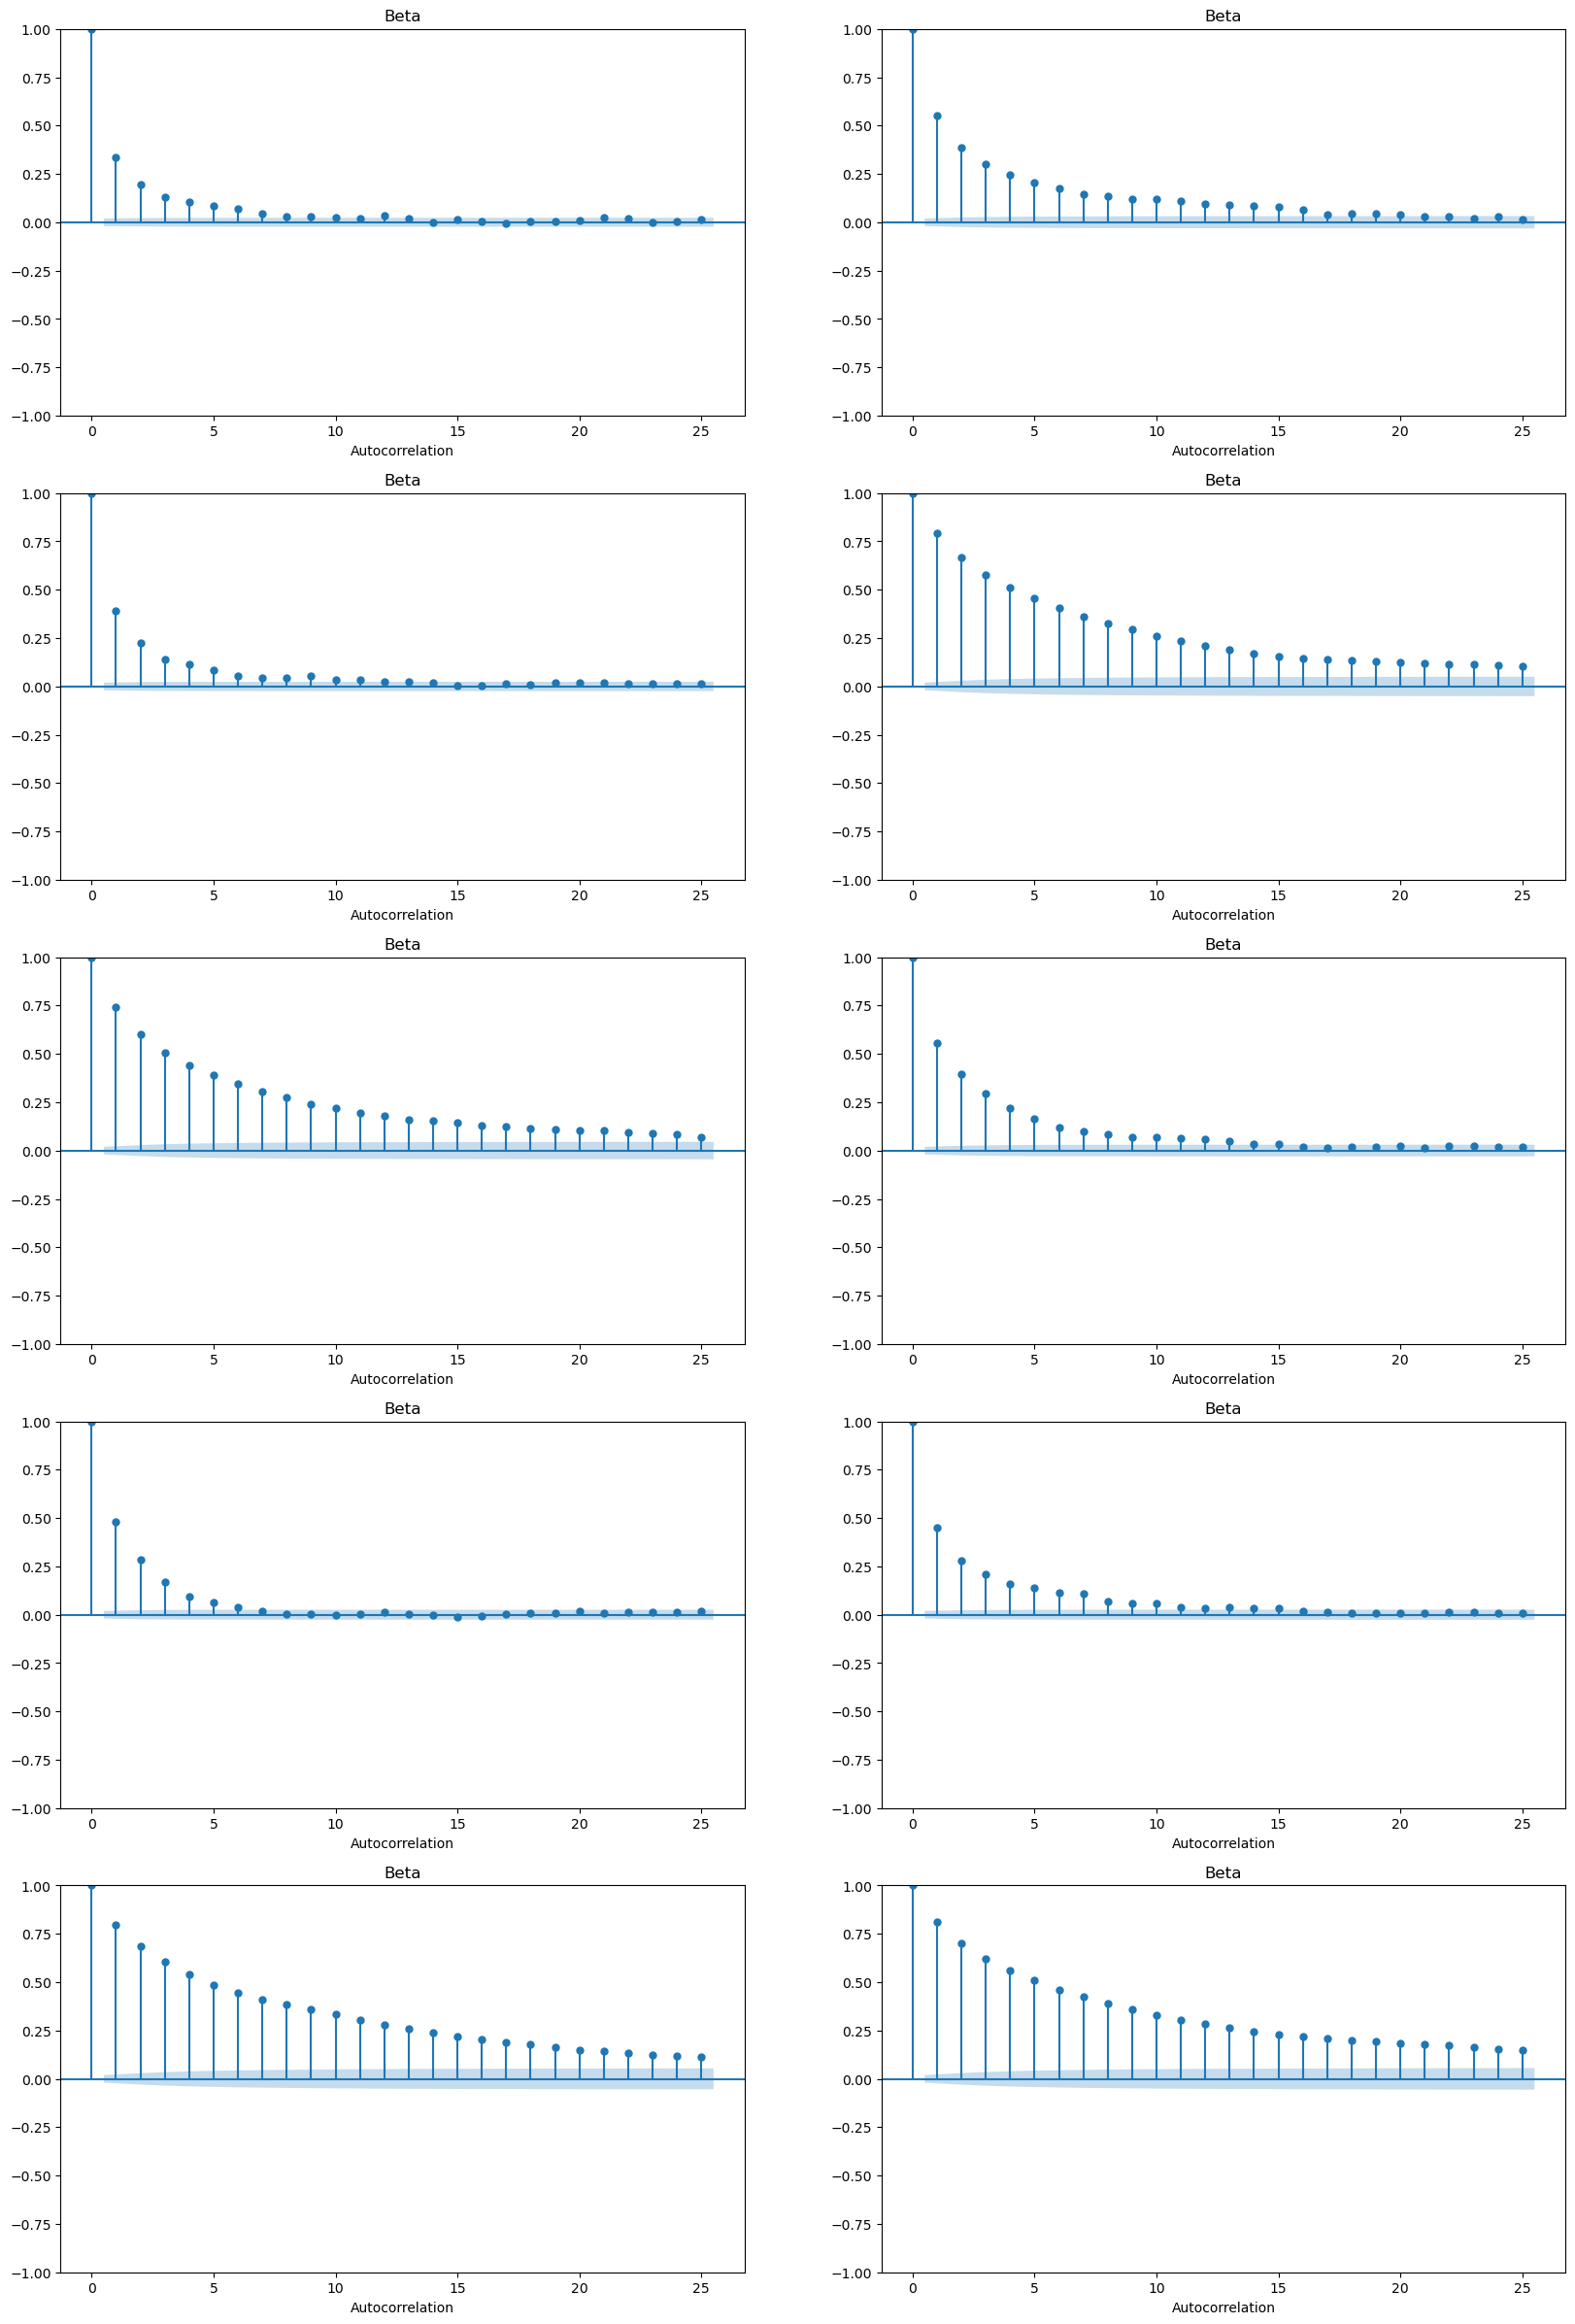

In [9]:
f, axes = plt.subplots(5, 2, figsize=(20, 30))
axes=axes.ravel()

for i in range(10):
    
    tsaplots.plot_acf(beta_sample[:,:,1][np.where(beta[:,0]!=0),:][0,i,:],lags=25,ax=axes[i])
    axes[i].set_xlabel('lag')
    axes[i].set_xlabel('Autocorrelation')
    axes[i].set_title('Beta')

    
plt.show()